# Lab2: CNN Visualization
by Lawrence (Jake) Klinkert and Hongjin (Tony) Yu

Submission Details: Turn in the rendered jupyter notebook (exported as HTML) to canvas. Only one notebook per team is required, but team names must be on the assignment. 

In [3]:
from PIL import Image

In this lab you will find and analyze a circuit in a common neural network.  A reference figure is also shown to help clarify the process of finding and analyzing deep circuits. https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html

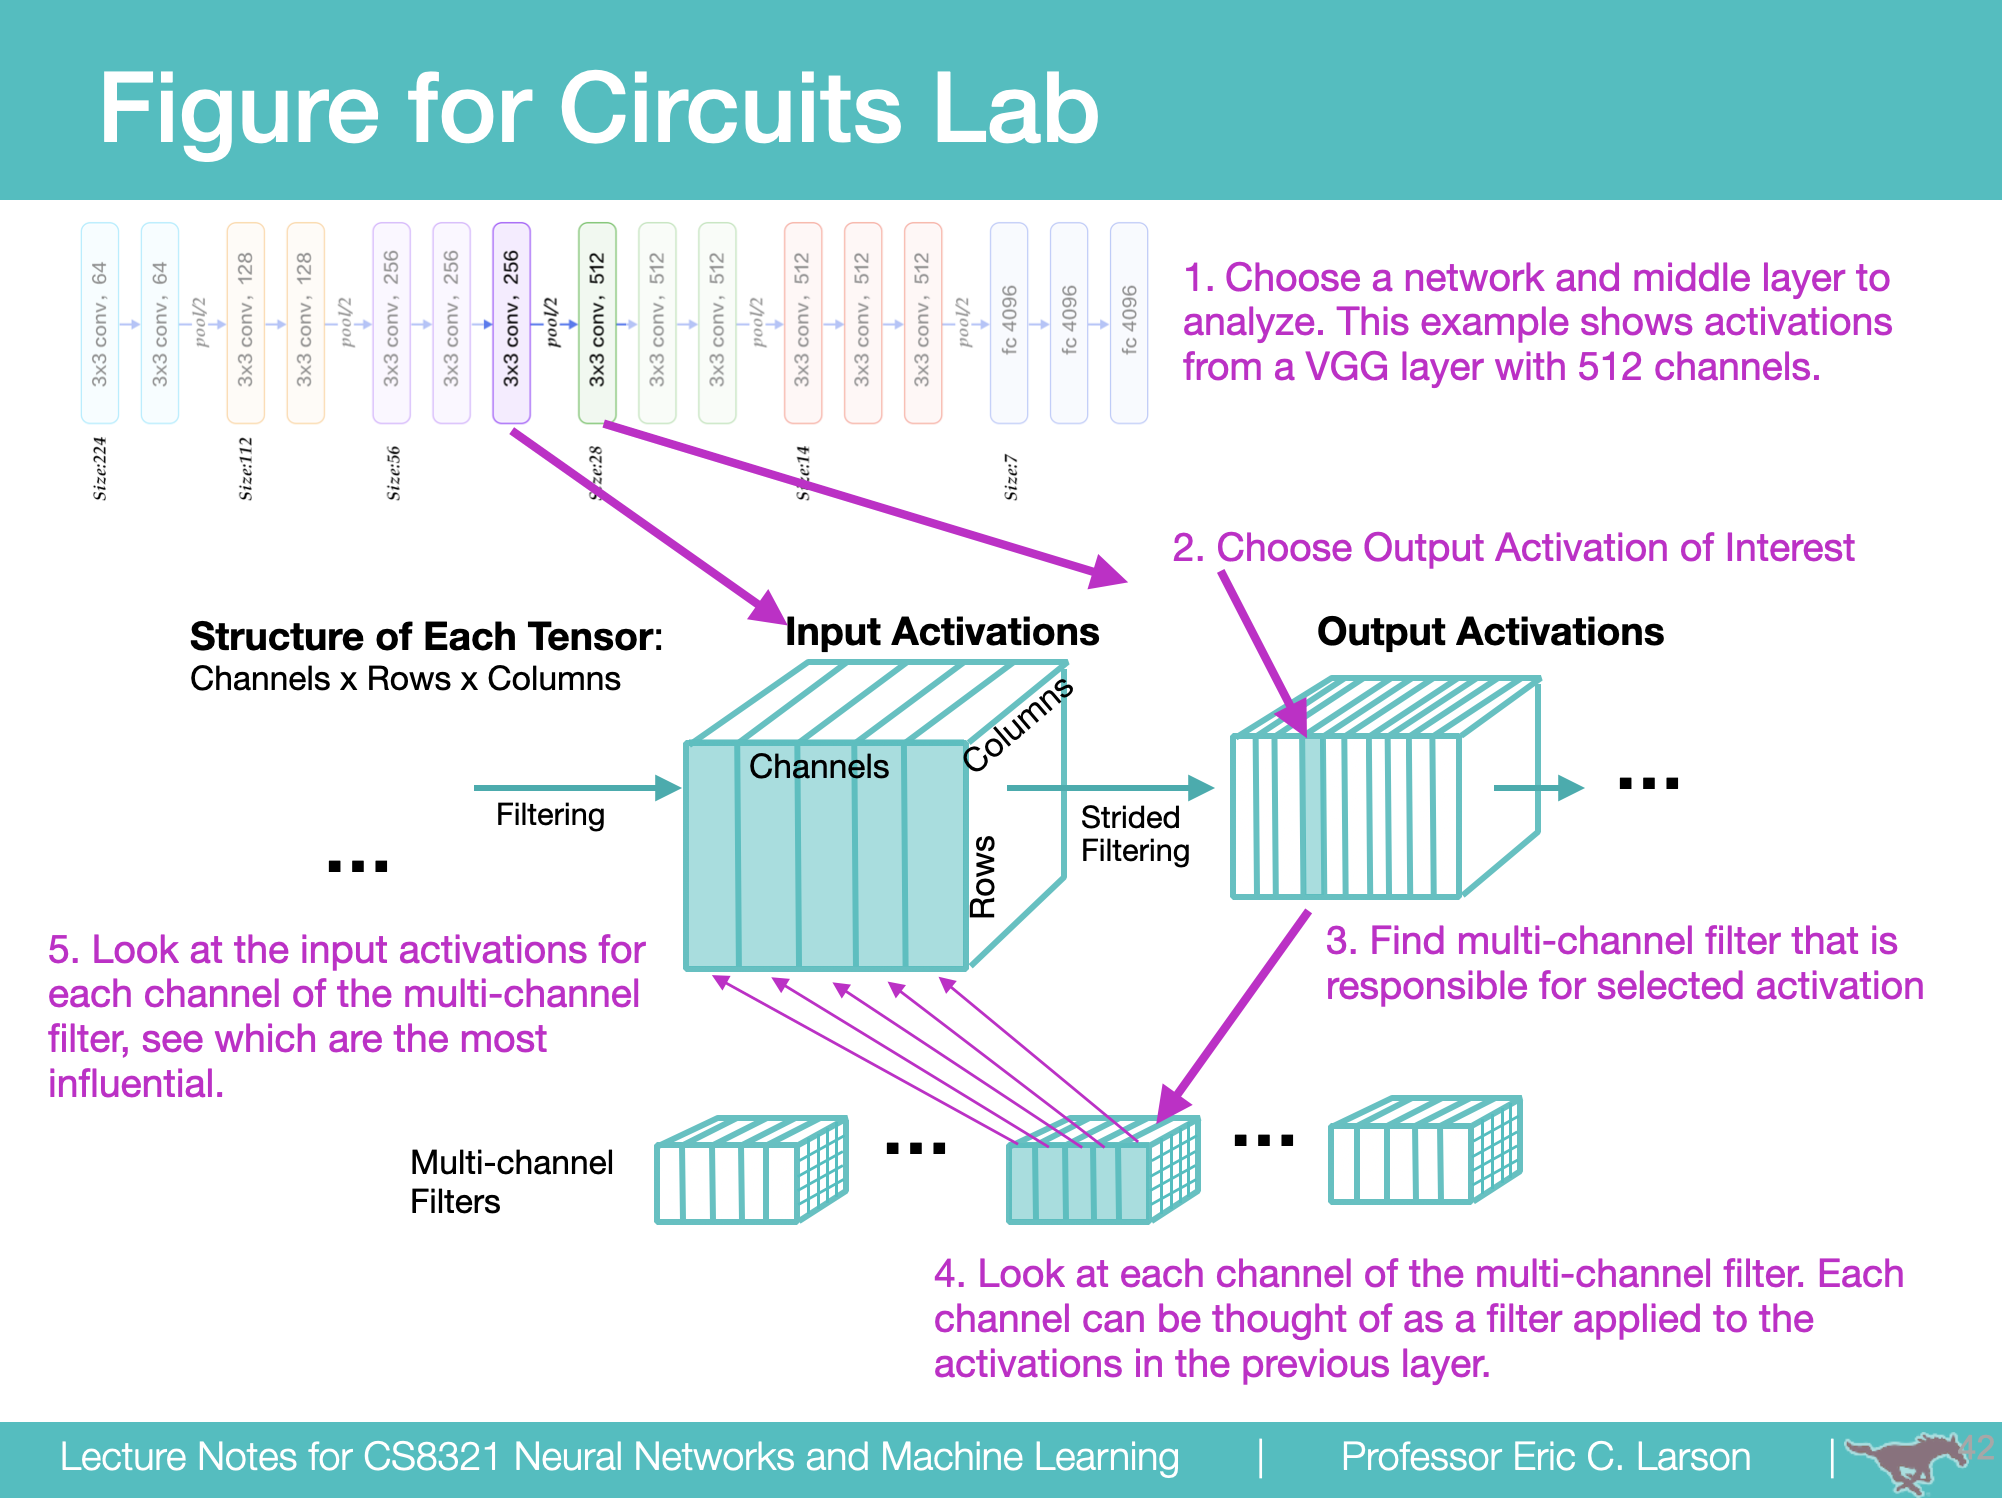

In [4]:
Image.open("Data/CircuitsFigure.png")

[3 Points] In groups, you should select a convolutional neural network model that has been pre-trained on a large dataset (preferably, ImageNet). These already trained models are readily available online through many mechanisms, including the keras.application package (Inception, Xception, VGG etc.) https://keras.io/api/applications/Links to an external site. Simplicity in architecture is helpful (such as VGG or other network with relatively few layers and without complex feed forward operations in the overall flow). 

Explain the model you chose and why.  Classify a few images with pre-trained network to verify that it is working properly.

[4 Points] Select a multi-channel filter (i.e., a feature) in a layer in which to analyze as part of a circuit. This should be a multi-channel filter in a "mid-level" portion of the network (that is, there are a few convolutional layers before and after this chosen layer). You might find using OpenAI microscope a helpful tool for selecting a filter to analyze without writing too much code: https://microscope.openai.com/models/

Using image gradient techniques, find an input image that maximally excites this chosen multi-channel filter. General techniques are available from f. Chollet: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter09_part03_interpreting-what-convnets-learn.ipynbLinks to an external site.

Give a hypothesis for what this multi-channel filter might be extracting. That is, what do you think its function is in the network? 

If using code from another source, you must heavily document the code so that I can grade your understanding of the code used. 

[4 Points] Analyze each channel of the multi-channel filter to this feature that might form a circuit. That is, visualize the convolutional filter (one channel) between the input activations and the current activation to understand which inputs make up a circuit. One method of doing this is given below:

Extract the filter coefficients for each input activation to that multi-channel filter. Note: If the multi-channel filter is 5x5 with an input channel size of 64, then this extraction will result in 64 different input filters, each of size 5x5. 

Keep the top six sets of inputs with the "strongest" weights. For now, you can use the L2 norm of each input filter as a measure of strength. Visualize these top six filters. 

For these six strongest input filters, categorize each as "mostly inhibitory" or "mostly excitatory." That is, does each filter consist of mostly negative or mostly positive coefficients?  

[4 Points] For each of the six input filters that are strongest, use image gradient techniques to visualize what each of these filters is most excited by (that is, what image maximally excites each of these filters?).

Use these visualizations, along with the circuit weights you just discovered to try and explain how this particular circuit works. An example of this visualization style can be seen here: https://storage.googleapis.com/distill-circuits/inceptionv1-weight-explorer/mixed3b_379.htmlLinks to an external site. 

Try to define the properties of this circuit using vocabulary from https://distill.pub/2020/circuits/zoom-in/Links to an external site. (such as determining if this is polysemantic, pose-invariant, etc.)  